# Sentiment Analysis using NLP Part 1

### Group S2 - 2
- Alfred George (W0783363)
- Deepa Taneja Chawla (W0774178)
- NikulKumar Devataja (W0781660)
- Prathap David Carlo (W0787017)
- Rajesh Gandham (W0783532)

In [5]:
# Import the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import csv

In [6]:
# Read the data
df = pd.read_csv('Restaurant_Reviews.tsv', delimiter ='\t')

In [7]:
df.head()

,Review,Liked
0,Wow... Loved this place. 25 times,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


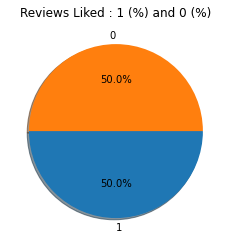

In [8]:
# Create a pie chart by airline %
plt.pie(df['Liked'].value_counts(),labels=df['Liked'].value_counts().index,
autopct='%1.1f%%',
counterclock=False, shadow=True)
plt.title('Reviews Liked : 1 (%) and 0 (%)')
plt.show()

## Text Processing

In [9]:
!pip install nltk

In [10]:
import warnings
warnings.filterwarnings("ignore")
# Clean the text by removing any extra characters 
import re # tools for cleaning text
import nltk # library to perform NLP
nltk.download('stopwords') # tool to remove the non-essential words. It is a list of words
nltk.download('words')
from nltk.corpus import stopwords
# Stemming means taking the root of the word such as love from loved or loving
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package words to
[nltk_data]     C:\Users\prath\AppData\Roaming\nltk_data...
[nltk_data]   Package words is already up-to-date!


In [11]:
# Steps for cleaning the first review and apply for loop on all the reviews
df['Review'][0]
review = re.sub('[^a-zA-Z]', ' ', df['Review'][0]) # only keep the letters so what we dont want to remove
review = review.lower() # make all letters as lowercase 
review = review.split()  # split the review into separate words to create a list of words
ps =PorterStemmer()
review = [ps.stem(word) for word in review if not  word in set(stopwords.words('english'))] # use set for larger text
review = ' '.join(review) # take the list of words back into the string

In [8]:
review

'wow love place time'

In [ ]:
from nltk.stem import WordNetLemmatizer
from nltk.corpus import words
import string
def create_corpus(data, length):
    corpus = [] # Build a new list for all the words from all the reviews
    # corpus is a collection of text and a common term used in NLP
    ps =PorterStemmer()
    stemmer = nltk.SnowballStemmer("english")
    stopword=set(stopwords.words('english'))
    
    for i in range (0, length):
        review = re.sub('[^a-zA-Z]', ' ', data[i] )
        review = review.lower()
        review="".join(char for char in review if char not in string.punctuation)
        review = review.lower()
        review = [word for word in review.split() if not word in stopword]
        review= [w for w in review if w in words.words()]
        review = [stemmer.stem(word) for word in review]
        review = ' '.join(review)
        corpus.append(review)
    return corpus
corpus1=create_corpus(df['Review'], 1000)

In [ ]:
corpus1[:5]

## Feature Extraction
### Bag of Words Model

In [ ]:
# Create the bag of words model
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features= 1500)# We restrict the words to 1500 which keeps the most frequent words
cv_total=CountVectorizer()

In [ ]:
X = cv.fit_transform(corpus1).toarray()# independent variables
X2= cv_total.fit_transform(corpus1).toarray()

In [ ]:
X.shape

In [ ]:
X2.shape

In [ ]:
#print(cv.get_feature_names())

In [ ]:
#cv.vocabulary_


In [ ]:
cv_dataframe=pd.DataFrame(list(cv.vocabulary_.items()), columns=['word','freq'])
cv_dataframe.sort_values(by='freq',ascending=False).head()

In [ ]:
cv2_dataframe=pd.DataFrame(list(cv_total.vocabulary_.items()), columns=['word','freq'])
cv2_dataframe.sort_values(by='freq',ascending=False).head()

In [ ]:
cv_dataframe.shape

In [ ]:
cv2_dataframe.shape

In [ ]:
cv_dataframe['freq'].sum()

In [ ]:
cv2_dataframe['freq'].sum()

In [ ]:
from PIL import Image
import re
from wordcloud import WordCloud, STOPWORDS

wc=WordCloud(background_color = "white", stopwords = STOPWORDS, height=600,width=800)
#wc.generate(str(cv.get_feature_names()))
wc.generate(str(corpus1))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
print(plt.show())

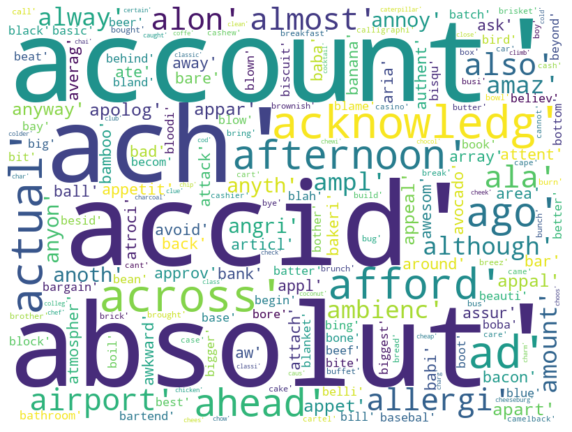

None


In [25]:
wc=WordCloud(background_color = "white", stopwords = STOPWORDS, height=600,width=800)
wc.generate(str(cv.get_feature_names()))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
print(plt.show())

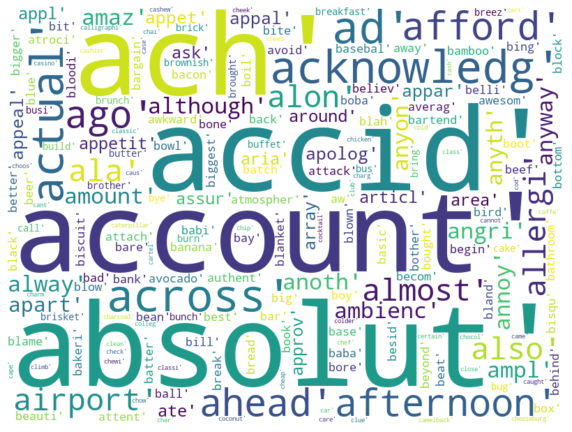

None


In [26]:
wc=WordCloud(background_color = "white", stopwords = STOPWORDS, height=600,width=800)
wc.generate(str(cv_total.get_feature_names()))
plt.figure(figsize=(10,10))
plt.imshow(wc, interpolation="bilinear")
plt.axis("off")

#Show the wordcloud
print(plt.show())

In [27]:
X.shape

(1000, 1191)

In [28]:
y = df.iloc[:, 1].values # dependent variable (These are your Liked values from the dataset)

 ## Modeling 

In [29]:
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, accuracy_score, f1_score, recall_score, precision_score, roc_auc_score, plot_roc_curve, classification_report
import seaborn as sns

In [30]:
def create_model(classifier,randomstate,data,y):
    # Splitting the dataset into the Training set and Test set
    X_train, X_test, y_train, y_test = train_test_split(data, y, test_size = 0.20, random_state = randomstate)
    if classifier==1:
        classifier_model=GaussianNB()
    elif classifier==2:
        classifier_model=KNeighborsClassifier(n_neighbors = 2)
    elif classifier==3:
        classifier_model=SVC(kernel='linear', random_state=randomstate)
    elif classifier==4:
        classifier_model=DecisionTreeClassifier(random_state = randomstate)
    elif classifier==5:
        classifier_model=RandomForestClassifier(n_estimators=100,random_state = randomstate)
    
    # Fitting classifier to the Training set
    classifier_model.fit(X_train, y_train)
    
    # Predicting the Test set results 
    y_predict = classifier_model.predict(X_test)
    
    # Make the Confusion Matrix
    cm = confusion_matrix(y_test,y_predict)
    
    # Evaluate the results
    print("Confusion Matrix is : {}".format(cm))
    print("Accuracy Score is : {}".format(accuracy_score(y_test, y_predict)))
    print("F1 Score is : {}".format(f1_score(y_test, y_predict)))
    print("Recall_score is : {}".format(recall_score(y_test, y_predict)))
    print("Precision_score is :{}".format(precision_score(y_test, y_predict)))
    
    df_cm = pd.DataFrame(cm, index = (0, 1), columns = (0, 1))
    plt.figure(figsize = (10, 7))
    sns.heatmap(df_cm, annot = True, fmt ='g')
    print(plt.show)
    
    #Calculating ROC/AUC the Results
    print("ROC AUC Score is :{}".format(roc_auc_score(y_test, y_predict)))
    
    # adding ROC/AUC curve
    plot_roc_curve(classifier_model, X_test, y_test)
    
    print(classification_report(y_test, y_predict))

 #### Naive Bayes Model

Confusion Matrix is : [[52 45]
 [ 9 94]]
Accuracy Score is : 0.73
F1 Score is : 0.7768595041322315
Recall_score is : 0.912621359223301
Precision_score is :0.6762589928057554
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.7243519167250526
              precision    recall  f1-score   support

           0       0.85      0.54      0.66        97
           1       0.68      0.91      0.78       103

    accuracy                           0.73       200
   macro avg       0.76      0.72      0.72       200
weighted avg       0.76      0.73      0.72       200



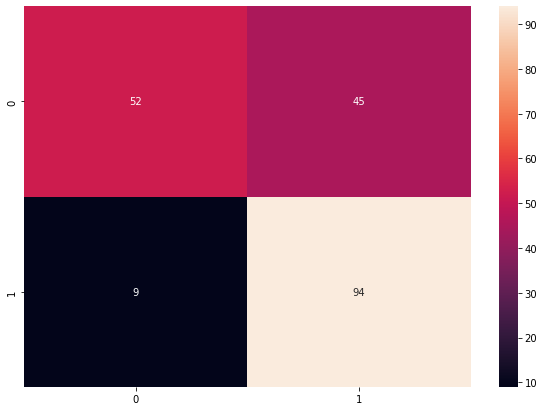

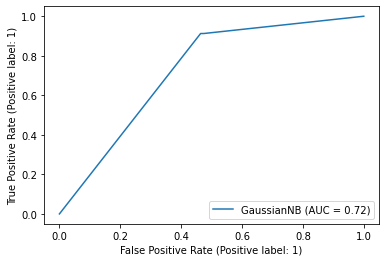

In [31]:
create_model(1,0,X,y)

### KNN Model

Confusion Matrix is : [[93  9]
 [54 44]]
Accuracy Score is : 0.685
F1 Score is : 0.5827814569536424
Recall_score is : 0.4489795918367347
Precision_score is :0.8301886792452831
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.6803721488595439
              precision    recall  f1-score   support

           0       0.63      0.91      0.75       102
           1       0.83      0.45      0.58        98

    accuracy                           0.69       200
   macro avg       0.73      0.68      0.66       200
weighted avg       0.73      0.69      0.67       200



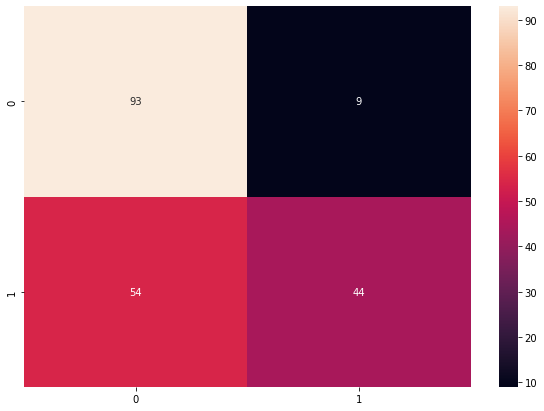

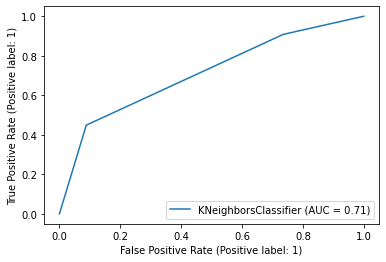

In [32]:
create_model(2,143,X,y)

### Support Vector Machine SVM Model

Confusion Matrix is : [[90 16]
 [29 65]]
Accuracy Score is : 0.775
F1 Score is : 0.7428571428571429
Recall_score is : 0.6914893617021277
Precision_score is :0.8024691358024691
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.7702729827378563
              precision    recall  f1-score   support

           0       0.76      0.85      0.80       106
           1       0.80      0.69      0.74        94

    accuracy                           0.78       200
   macro avg       0.78      0.77      0.77       200
weighted avg       0.78      0.78      0.77       200



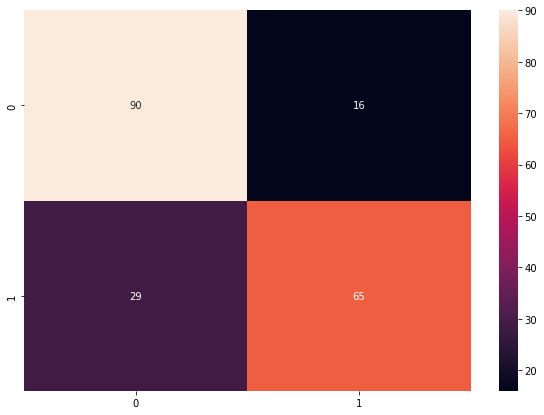

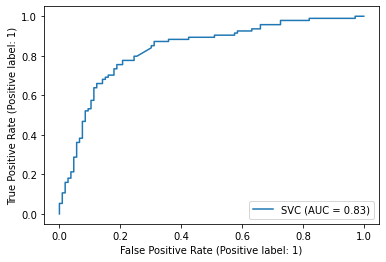

In [33]:
create_model(3,256,X,y)

### Decision Tree Classification Model

Confusion Matrix is : [[66 39]
 [30 65]]
Accuracy Score is : 0.655
F1 Score is : 0.6532663316582915
Recall_score is : 0.6842105263157895
Precision_score is :0.625
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.656390977443609
              precision    recall  f1-score   support

           0       0.69      0.63      0.66       105
           1       0.62      0.68      0.65        95

    accuracy                           0.66       200
   macro avg       0.66      0.66      0.65       200
weighted avg       0.66      0.66      0.66       200



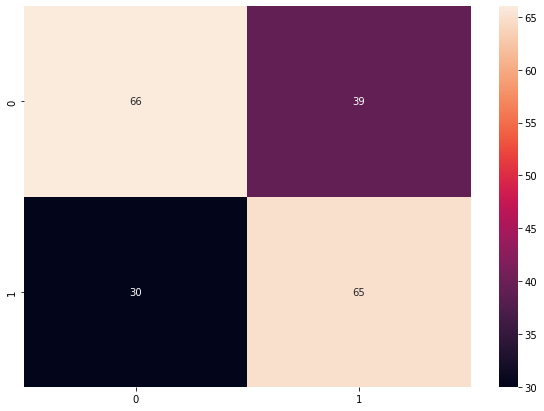

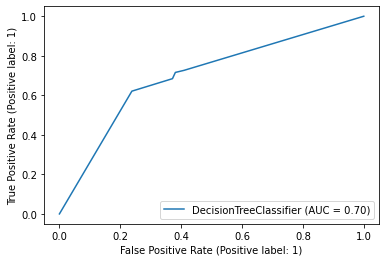

In [34]:
create_model(4,156,X,y)

### Random Forest Model

Confusion Matrix is : [[71 26]
 [25 78]]
Accuracy Score is : 0.745
F1 Score is : 0.753623188405797
Recall_score is : 0.7572815533980582
Precision_score is :0.75
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.7446201581423282
              precision    recall  f1-score   support

           0       0.74      0.73      0.74        97
           1       0.75      0.76      0.75       103

    accuracy                           0.74       200
   macro avg       0.74      0.74      0.74       200
weighted avg       0.74      0.74      0.74       200



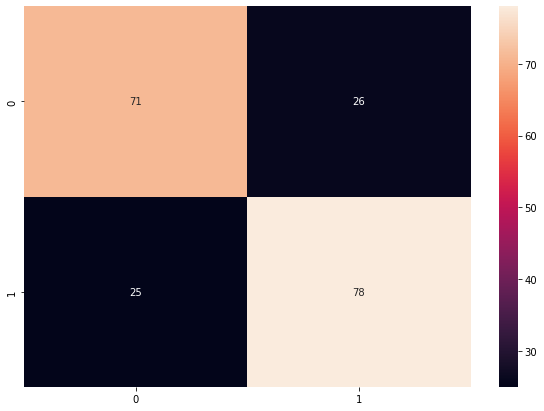

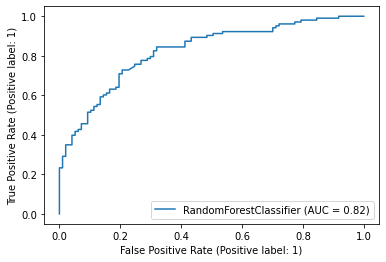

In [35]:
create_model(5,0,X,y)

## Feature Extraction
### TF IDF 

In [36]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer (max_features=2500, min_df=7, max_df=0.8, stop_words=stopwords.words('english'))


In [37]:
corpus = vectorizer.fit_transform(corpus1).toarray()

In [38]:
X_new =corpus

In [39]:
X_new.shape

(1000, 157)

In [40]:
y.shape

(1000,)

## Modeling

### Random Forest Model

Confusion Matrix is : [[79 18]
 [40 63]]
Accuracy Score is : 0.71
F1 Score is : 0.6847826086956521
Recall_score is : 0.6116504854368932
Precision_score is :0.7777777777777778
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.7130417375638074
              precision    recall  f1-score   support

           0       0.66      0.81      0.73        97
           1       0.78      0.61      0.68       103

    accuracy                           0.71       200
   macro avg       0.72      0.71      0.71       200
weighted avg       0.72      0.71      0.71       200



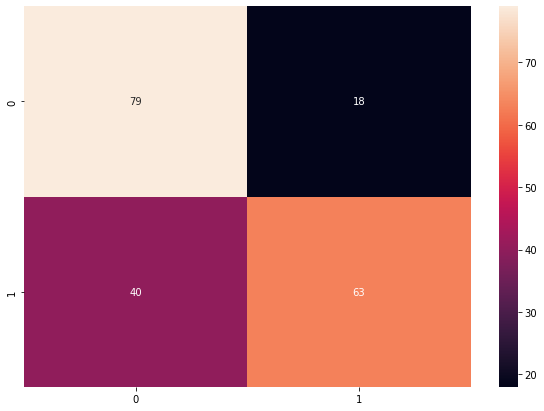

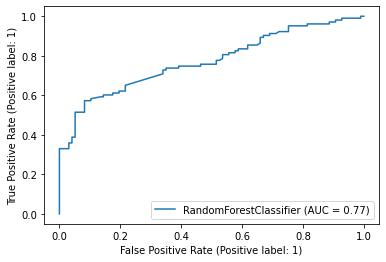

In [41]:
create_model(5,0,X_new,y)

### Decision Tree Model

Confusion Matrix is : [[73 32]
 [33 62]]
Accuracy Score is : 0.675
F1 Score is : 0.6560846560846562
Recall_score is : 0.6526315789473685
Precision_score is :0.6595744680851063
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.6739348370927318
              precision    recall  f1-score   support

           0       0.69      0.70      0.69       105
           1       0.66      0.65      0.66        95

    accuracy                           0.68       200
   macro avg       0.67      0.67      0.67       200
weighted avg       0.67      0.68      0.67       200



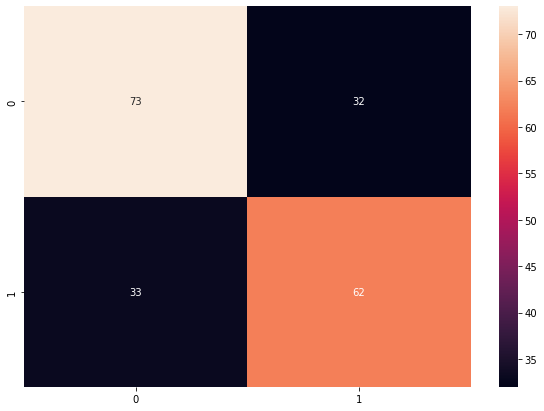

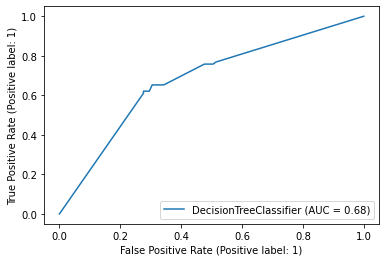

In [42]:
create_model(4,156,X_new,y)

### Support Vector Machine SVM Model

Confusion Matrix is : [[88 18]
 [38 56]]
Accuracy Score is : 0.72
F1 Score is : 0.6666666666666666
Recall_score is : 0.5957446808510638
Precision_score is :0.7567567567567568
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.7129666800481734
              precision    recall  f1-score   support

           0       0.70      0.83      0.76       106
           1       0.76      0.60      0.67        94

    accuracy                           0.72       200
   macro avg       0.73      0.71      0.71       200
weighted avg       0.73      0.72      0.72       200



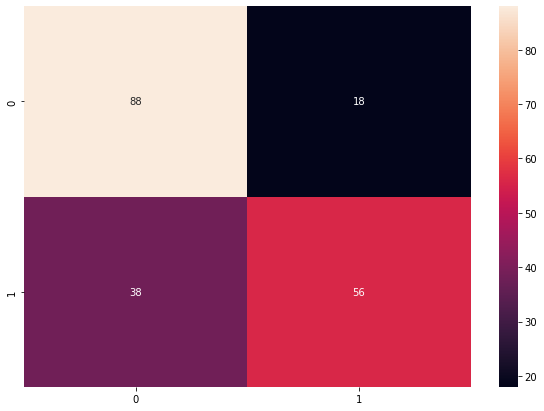

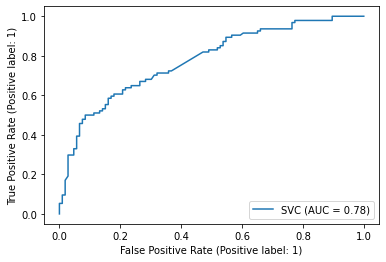

In [43]:
create_model(3,256,X_new,y)

### KNN Model

Confusion Matrix is : [[88 14]
 [64 34]]
Accuracy Score is : 0.61
F1 Score is : 0.4657534246575343
Recall_score is : 0.3469387755102041
Precision_score is :0.7083333333333334
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.6048419367747099
              precision    recall  f1-score   support

           0       0.58      0.86      0.69       102
           1       0.71      0.35      0.47        98

    accuracy                           0.61       200
   macro avg       0.64      0.60      0.58       200
weighted avg       0.64      0.61      0.58       200



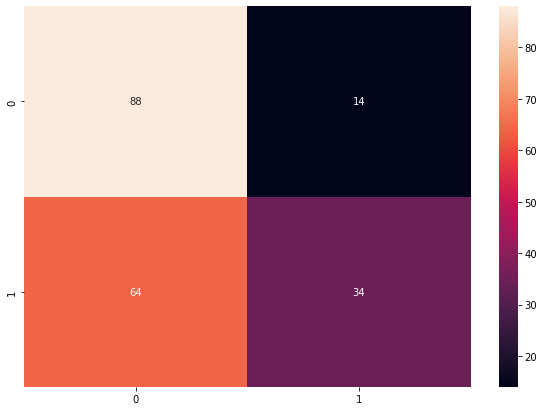

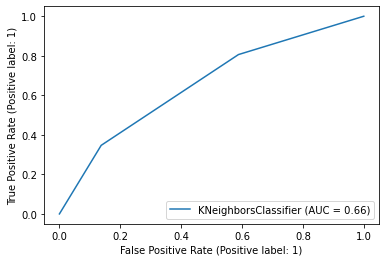

In [44]:
create_model(2,143,X_new,y)

### Naive Bayes Model

Confusion Matrix is : [[57 40]
 [24 79]]
Accuracy Score is : 0.68
F1 Score is : 0.7117117117117117
Recall_score is : 0.7669902912621359
Precision_score is :0.6638655462184874
<function show at 0x000001A4A6A03A60>
ROC AUC Score is :0.6773095786207587
              precision    recall  f1-score   support

           0       0.70      0.59      0.64        97
           1       0.66      0.77      0.71       103

    accuracy                           0.68       200
   macro avg       0.68      0.68      0.68       200
weighted avg       0.68      0.68      0.68       200



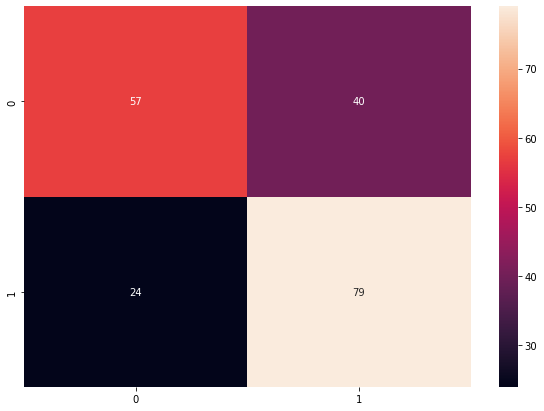

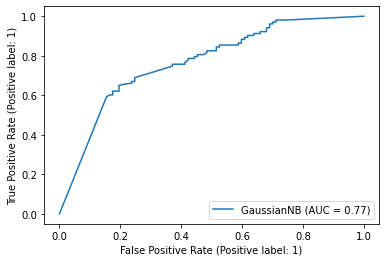

In [45]:
create_model(1,0,X_new,y)

### Questions

#### What is Natural Language processing and why is it important in the context of data analysis in today’s world?
- NLP refers to a method of analysing and comprehending vast volumes of text data. NLP allows computers to comprehend text, hear voice, analyse it, measure sentiment, and determine which bits are important.
- Natural language processing aids computers in conversing with humans in their own language and scales other language-related activities. 
- Handling big amounts of text data: NLP has become mainstream because it can now be used to handle large amounts of text data at unprecedented speeds using cloud/distributed computing.
- NLP is vital for many downstream applications, such as speech recognition and text analytics, since it helps resolve ambiguity in language and provides helpful quantitative structure to the data.
- The NLP assists the computer in comprehending the meaning of phrases, which increases machine translation efficacy. 
- **For sentiment analysis** NLP is particularly useful. Sentiment analysis is the process of assessing a person's sentiments or opinions about anything using data such as text, photos, video, or any other unstructured data. It aids in the decision-making process for businesses. If public opinion of a product is negative, a corporation may attempt to change the product or cease manufacturing completely to minimise losses. Twitter feeds, for example, or product reviews etc.

#### What is the purpose of stopwords in NLP?
- Stopwords are the most prevalent words that do not contribute much meaning to a phrase in any language.
- They can safely be ignored without sacrificing the meaning of the sentence hence in machine learning, stopwords are rendered irrelevant. The accuracy of the machine learning model may suffer as a result of stopwords. As a result, we'd have to get rid of it. Stop words include 'is,' 'our,' and 'your,' among others.
- Stopwords are deleted during the NLP process when we have a job of text categorization or sentiment analysis since they do not contribute any information to our model, but they are required when we have a task of machine translation, text summarization, or other similar tasks.
- Stop words include:articles (a, an, the) , pronouns (I, you, your, his, hers, him, her, ours, etc), prepositions (as, at, by, to, for, from, in, into, of, onto, etc), conjunctions (and, or, but, unless, since, because, although, etc), most auxiliary verbs (am, is, are, was, were, etc).

#### What is the purpose of toarray() in the following code
X = cv.fit_transform(corpus).toarray()

A corpus is a collection of text gathered from all the reviews in the dataset. In the above code cv is the object of CountVectorizer() that converts the corpus into vectors and then counts the frequency of each vector. We need this vectorised data in the form of array to feed into our ML model hence .toarray() is transforming the text into numerical matrix.

#### Evaluate the performance of each of these models. Create a table to highlight the differences across both the approaches.




|# | Model | Accuracy  | F1 Score |  ROC_AUC Score| TF-IDF Accuracy Score | TF-IDF F1 Score |  TF-IDF ROC_AUC Score|
|-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
| 1 | Naïve Bayes Model | 0.725 | 0.767 | 0.72| 0.67 | 0.7 |0.66 |
| 2 | K-Nearest Neighbors (KNN) | 0.705 | 0.61 | 0.70| 0.635 | 0.48 | 0.62 |
| 3 | Support Vector Machine (SVM) | 0.77 | 0.74 | 0.76| 0.68 | 0.61 | 0.67 |
| 4 | Decision Tree |0.71  | 0.67 | 0.70 |0.69 | 0.67 | 0.68 |
| 5 | Random Forest |0.71 | 0.67 | 0.71 | 0.74 | 0.71 | 0.74 |

#### Which model predicts the best ?
SVM gave the highest accuracy when created model's without feature extraction with 77% accuracy, F1 Score of 74% and ROC_AUC curve score of 76%.  After the feature extraction Random Forest Model has the best accuracy. According to above comparision, it seems that the The Random Forest Model is the best model since accuracy increased from 71% to 74%, for all the other models' accuracy decreased after feature extraction.